<a href="https://colab.research.google.com/github/vard-uhi/tasks/blob/main/House_Sales_in_King_Count_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> :a notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of Bedrooms/House


<b>bathrooms</b>: Number of bathrooms/bedrooms

<b>sqft_living</b>: square footage of the home

<b>sqft_lot</b>: square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is  Overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> :square footage of house apart from basement


<b>sqft_basement</b>: square footage of the basement

<b>yr_built</b> :Built Year


<b>yr_renovated</b> :Year when house was renovated

<b>zipcode</b>:zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> :lotSize area in 2015(implies-- some renovations)

You will require the following libraries 

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

#pandas for data manipulation, transformation
import pandas as pd 

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns #visualization
%matplotlib inline 

#for scientific computations
import numpy as np 

#for train and test split
from sklearn.model_selection import train_test_split 
#model building
import statsmodels.api as sm

#internal validity stastistical tests and plots
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.metrics import r2_score #R-squared
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **1.Importing the Data**

In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving kc_house_data_NaN.csv to kc_house_data_NaN.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['kc_house_data_NaN.csv']))

In [4]:
#copying raw data
df = raw_data.copy()

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Question 1 
Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image. 

In [ ]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#statistical summary of the dataframe
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#statistical summary with categorical data
df.describe(include="all")

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


# **2.Data Wrangling**

#### Question 2 
Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to <code>True</code>

In [43]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 20)

we can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [44]:
#looking to find missing values
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [45]:
#list of all rows with missing vales
df[df.isnull().any(axis=1)].shape

(16, 20)

We see that we have 16 rows with missing values and they come from 'bedrooms' and 'bathrooms' columns.


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method replace. Don't forget to set the <code>inplace</code> parameter top <code>True</code>

In [46]:
#filling null values with mean
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bedrooms' </codse> using the method replace.Don't forget to set the <code> inplace </code>  parameter top <code> Ture </code>

In [47]:
#filling null values with mean
df['bathrooms'].fillna(df['bedrooms'].mean(), inplace=True)

In [48]:
#rechecking for null values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [49]:
#checking whether there are columns having same value for all observations
df.columns[df.nunique()==1]

Index([], dtype='object')

In [50]:
#checking for duplicates, 2 easy ways are:
print(df[df.duplicated()])
print(df.duplicated().any())

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []
False


As we see, we don't have duplicates. In case we have it, we can use drop_duplicates() method as linear regression assumes independence of observations.

# **3.Exploratory data analysis**

Question 3

Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.


In [ ]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [ ]:
#We can convert the series to a Dataframe as follows
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Question 4
Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers .

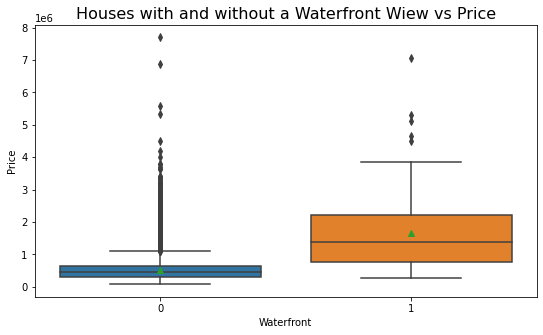

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(x="waterfront", y="price", data=df, showmeans=True)
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.title("Houses with and without a Waterfront Wiew vs Price",fontdict={"fontsize":16})
plt.show()

From this boxplot we can conclude that houses with Waterfront view have more Price outliers compared to houses without view.

Question 5
Use the function <code> regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

(0.0, 8081250.0)

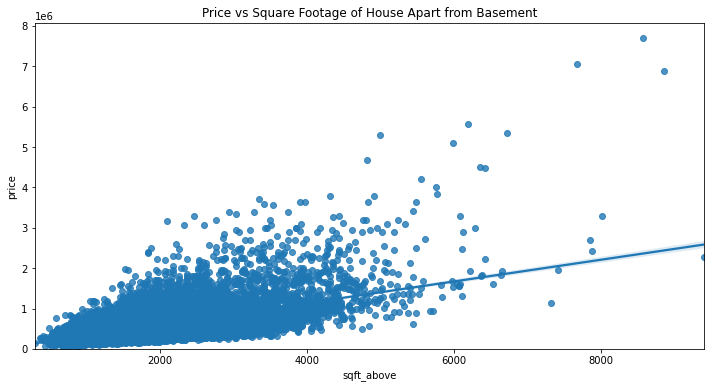

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x="sqft_above", y="price", data=df)
plt.title("Price vs Square Footage of House Apart from Basement")
plt.ylim(0,)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


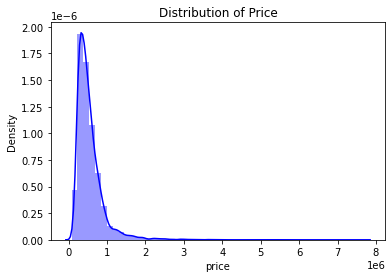

In [ ]:
# Visualising Distribution of Price
sns.distplot(df['price'],color="blue")
plt.title("Distribution of Price")
plt.show()

In [ ]:
# Let's check skewness
df['price'].skew()

4.024069144684712

As we see we have a rights skewed distribution of Price dependent variable. This means that data is distributed asymetric and mean is greater than median.

In [ ]:
#deleting 1% of our data
#df = df[df['price'] < df['price'].quantile(0.99)].reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


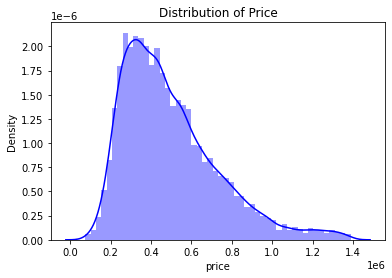

In [ ]:
# Visualising Distribution of Price
#sns.distplot(df['price'], color="blue")
#plt.title("Distribution of Price")
#plt.show()

In [ ]:
# Let's check skewness
#df['price'].skew()

1.0989651062620407

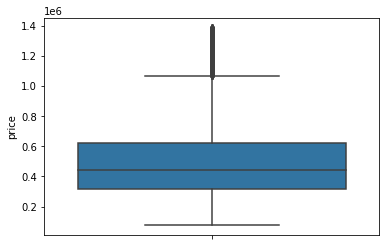

In [ ]:
#sns.boxplot(y = df['price'])

# **4.Model Development: Simple Linear Regression**

Question  6
Fit a linear regression model to predict the <code>'price'</code> using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

(0.0, 8084023.940494501)

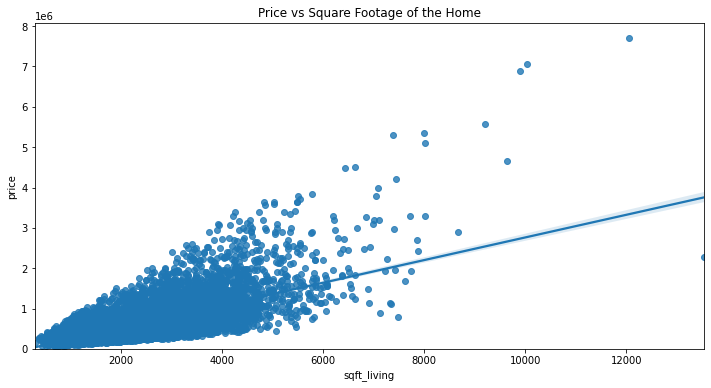

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x="sqft_living", y="price", data=df)
plt.title("Price vs Square Footage of the Home")
plt.ylim(0,)

In [ ]:
#creating Linear Regression Object
simple_reg = LinearRegression()

In [ ]:
x = df[['sqft_living']]
y = df['price']

In [ ]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
#fitting reg model to data
simple_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_hat_simple = simple_reg.predict(x_train)

In [ ]:
Y_hat_simple

array([455608.32114123, 237555.59327533, 259919.97562055, ...,
       550656.94610842,  64231.63009986, 833007.27321684])

In [ ]:
simple_reg.intercept_

-41999.18603993731

In [ ]:
simple_reg.coef_

array([279.55477932])

In [ ]:
#calculating R-square
simple_reg.score(x_train,y_train)

0.49238383875829517

In [ ]:
#mean squared error
mse_simple = mean_squared_error(y_train, Y_hat_simple)

In [ ]:
mse_simple

66319347784.51793

Text(0.5, 1.0, 'Predictions on train data')

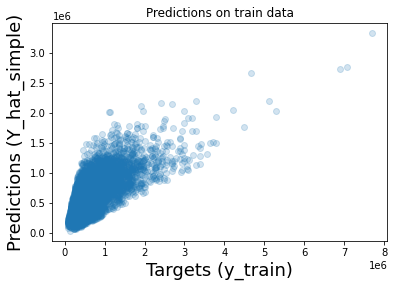

In [ ]:
plt.scatter(y_train, Y_hat_simple, alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (Y_hat_simple)',size=18)
plt.title("Predictions on train data")

In [ ]:
#predicting on test data
y_hat_test = simple_reg.predict(x_test)

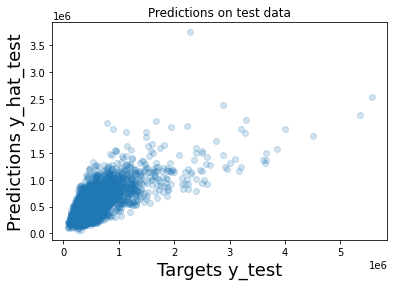

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets y_test', size = 18)
plt.ylabel('Predictions y_hat_test',size = 18)
plt.title("Predictions on test data")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


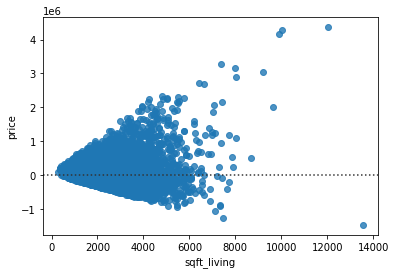

In [ ]:
#resedual plot
sns.residplot(df['sqft_living'], df['price'])
plt.show()

# **5.Model Development Multiple linear Regression**

**Model Selection**


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.

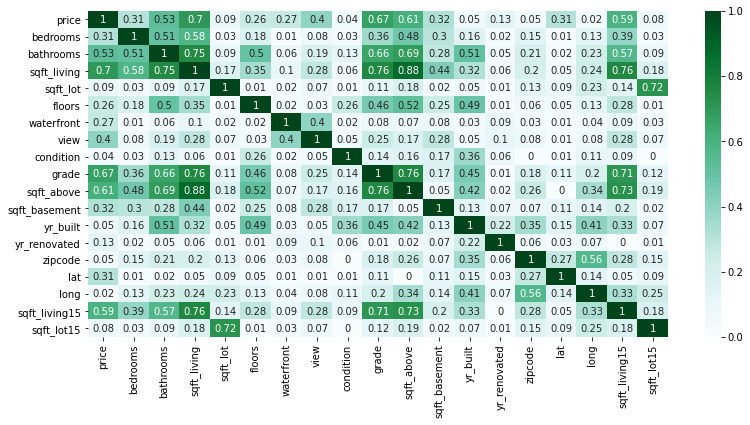

In [ ]:
#Let's visualize correlations
plt.figure(figsize=(13,6))
sns.heatmap(df.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

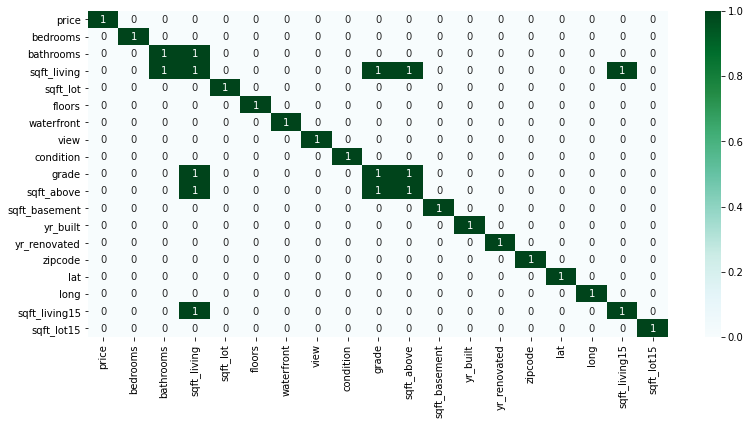

In [ ]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
#Thus we will include only several of them in the analysis
plt.figure(figsize=(13,6))
sns.heatmap(df.corr().abs()>=0.75, annot=True, cmap = "BuGn")
plt.show()

Checking multicoliniarity

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [ ]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [ ]:
df['waterfront'].unique()

array([0, 1])

In [51]:
variables = df[["sqft_living", "floors", "waterfront", "condition"]]
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [52]:
vif

,vif,features
0,6.893247,sqft_living
1,7.729468,floors
2,1.017950,waterfront
3,6.697341,condition


As we see some of the variable have a high vif value, which indicates multicoliniarity between variables. For conducting multiple linear regression we will choose list of variables that have small vif. best predictores

get dummies

In [53]:
df_dummies = pd.get_dummies(df, columns=['floors', 'condition'])

In [54]:
df_dummies.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5
0,20141013T000000,221900.0,3.0,1.00,1180,5650,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0,0,0,0,1,0,0
1,20141209T000000,538000.0,3.0,2.25,2570,7242,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,1,0,0
2,20150225T000000,180000.0,2.0,1.00,770,10000,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1,0,0,0,0,0,0,0,1,0,0
3,20141209T000000,604000.0,4.0,3.00,1960,5000,0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0,0,0,0,0,0,0,1
4,20150218T000000,510000.0,3.0,2.00,1680,8080,0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1,0,0,0,0,0,0,0,1,0,0


In [55]:
df_data = df_dummies[["price", "sqft_living", "waterfront", "floors_1.0", "floors_1.5", "floors_2.0",
                     "floors_2.5", "floors_3.0", "floors_3.5", "condition_1", "condition_2", "condition_3",
                      "condition_4", "condition_5"
                      ]]

In [56]:
df_data.head()

,price,sqft_living,waterfront,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,1180,0,1,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,0,0,0,1,0,0,0,0,0,1,0,0
2,180000.0,770,0,1,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,0,1,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
#df_data["ft_living"] = np.sqrt(df_data["sqft_living"])

In [ ]:
#df_data = df_data.drop(['sqft_living'], axis=1)

**Multiple Linear Regression**

### Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [57]:
inputs = df_data.drop(['price'], axis=1)

In [58]:
target = df_data['price']

In [72]:
reg_multiple = LinearRegression()

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size = 0.2, random_state=42)

In [ ]:
reg_multiple.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_multiple.intercept_

52047.07212117914

In [ ]:
reg_multiple.coef_

array([ 2.78986149e+02,  7.86976995e+05, -8.99238424e+04, -3.30606021e+04,
       -1.07696187e+05,  1.27941141e+05,  5.09990279e+04,  5.17404629e+04,
        2.38919750e+03, -3.64389711e+04, -2.75542379e+04,  3.82124683e+03,
        5.77827647e+04])

In [ ]:
#r-squared
reg_multiple.score(X_train, Y_train)

0.5428811445600691

In [ ]:
Y_hat_multiple = reg_multiple.predict(X_train)

In [ ]:
mse_multiple = mean_squared_error(Y_train, Y_hat_multiple)

In [ ]:
mse_multiple

59721944783.28768

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


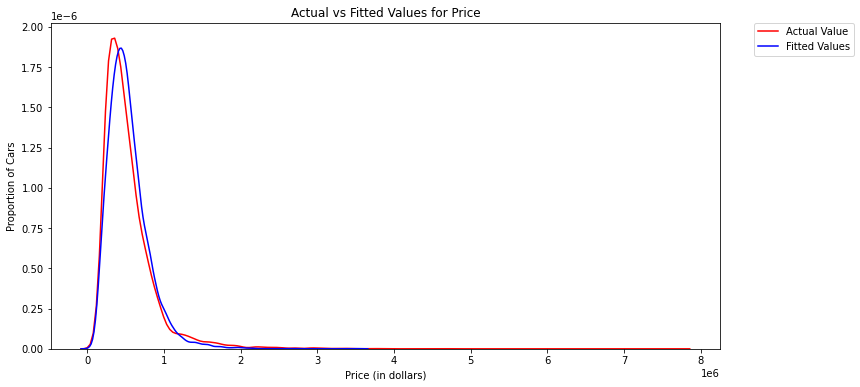

In [ ]:
#Actual vs Fitted Values for Price

plt.figure(figsize=(12, 6))


ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_multiple, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# **Polynomial Regression**


In [21]:
x_p1 = df['sqft_living']
y_p1 = df['price']

In [27]:
xp = x_p1.values.reshape(-1,1)

In [22]:
poly = PolynomialFeatures(degree =3)

In [28]:
model_poly = poly.fit_transform(xp)

In [29]:
lin_poly = LinearRegression()

In [30]:
lin_poly.fit(model_poly, y_p1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Fitting Polinomial Regression to the dataset
#preprocessing tool to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

#we create poly object
poly = PolynomialFeatures(degree =3)

#we use poly object to transform x data into polynomial feature dataset

model_poly = poly.fit_transform(x_p)

#we create linerar regression ogject

lin_poly = LinearRegression()

#we pass model_poly to linear regression model

lin_poly.fit(model_poly, y)


In [36]:
hat = lin_poly.predict(model_poly)

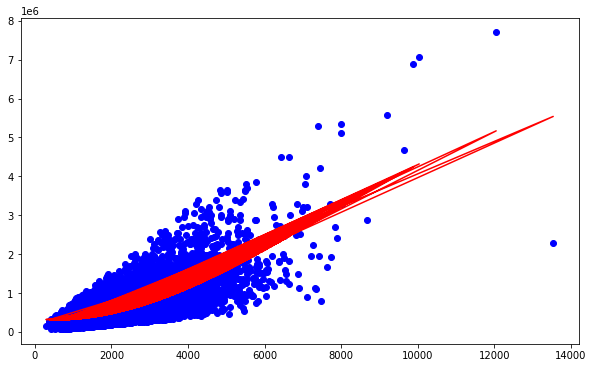

In [40]:
#visualising Polynomial Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(xp, y_p1, color='blue')
plt.plot(xp, lin_poly.predict(model_poly), color = 'red')

In [35]:
np.polyfit(x_p1, y_p1, 3)

array([-3.84055260e-06,  8.70465089e-02, -9.01819864e+01,  3.36819748e+05])

In [37]:
r_squared = r2_score(y_p1, hat)
print('The R-square value is: ', r_squared)

The R-square value is:  0.5390045510503199


**Multivariate Polynomial Regression**

In [ ]:
#we can perform a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [41]:
#we create a PolynomialFeatures object of degree 2
poly_multi = PolynomialFeatures(degree=2)

In [60]:
model_poly_multi = poly_multi.fit_transform(inputs)

In [61]:
lin_poly_multi = LinearRegression()

In [62]:
lin_poly_multi.fit(model_poly_multi, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
hat_multi = lin_poly_multi.predict(model_poly_multi)

In [64]:
r_squared = r2_score(target, hat_multi)
print('The R-square value is: ', r_squared)

The R-square value is:  0.5999876961113939


There are many steps to getting a prediction.

normalization - polinomial transform - linear regression

Pipeline sequentially perform a series of transformations. The last step carries out a prediction

# **Polinomial Regression and Pipline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [65]:
#We create a list of tuples, the first element in the tuple contains the name of the estimator model. 
#The second element contains model constructor
pip_input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), 
             ('model', LinearRegression())]

In [66]:
#we input the list as an argument to the pipeline constructor
pipe = Pipeline(pip_input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can normalize the data, perform a transform and fit the model simultaneously.

In [67]:
pipe.fit(inputs,target)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [ ]:
from sklearn.metrics import r2_score

In [68]:
ypipe = pipe.predict(inputs)
ypipe[0:4]

array([326725.5625, 593696.375 , 272886.    , 522492.8125])

In [69]:
#multivariate polinomial
r_squared = r2_score(target, ypipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.5999876962545992


# Module 5: MODEL EVALUATION AND REFINEMENT

**Cross-validation Score**

In [70]:
from sklearn.model_selection import cross_val_score

In [73]:
Rcross = cross_val_score(reg_multiple, inputs, target, cv=4)

In [77]:
Rcross

array([0.55200305, 0.54209073, 0.54002324, 0.54016637])

In [78]:
from sklearn.model_selection import cross_val_predict

In [79]:
yhat = cross_val_predict(reg_multiple, inputs, target, cv=4)
yhat[0:5]

array([266111.13469638, 633492.62320808, 151847.6390371 , 579106.57952057,
       405456.86111013])